In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1622,2020-09-13,United Kingdom,363960.0,365174.0,41659.0,41623.0,-1214.0,36.0
1623,2020-09-13,Germany,259807.0,259428.0,9354.0,9349.0,379.0,5.0
1624,2020-09-13,Iran,401524.0,399940.0,23154.0,23029.0,1584.0,125.0
1625,2020-09-13,Turkey,289340.0,289635.0,6997.0,6999.0,-295.0,-2.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  9672.824830977259
RMSE =  36734.901590589754


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  304.34296250768284
RMSE =  749.9781230163138


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  69648.73376623377
RMSE =  115766.15940701604
-- World performances for deaths --
MAE =  1743.844155844156
RMSE =  2116.8576533804357


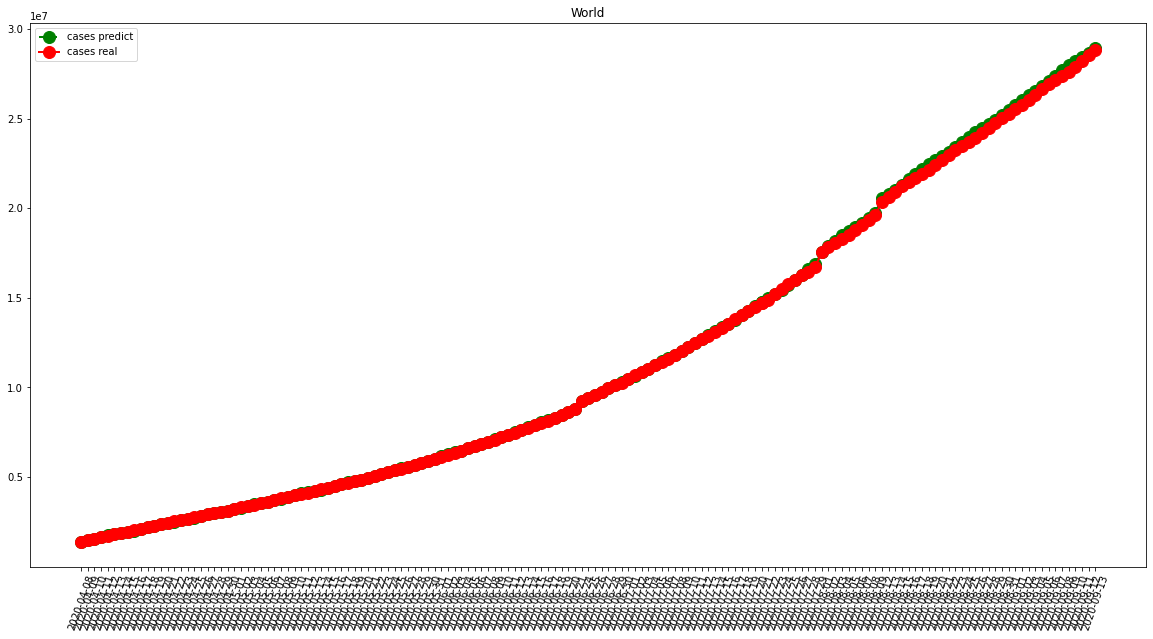

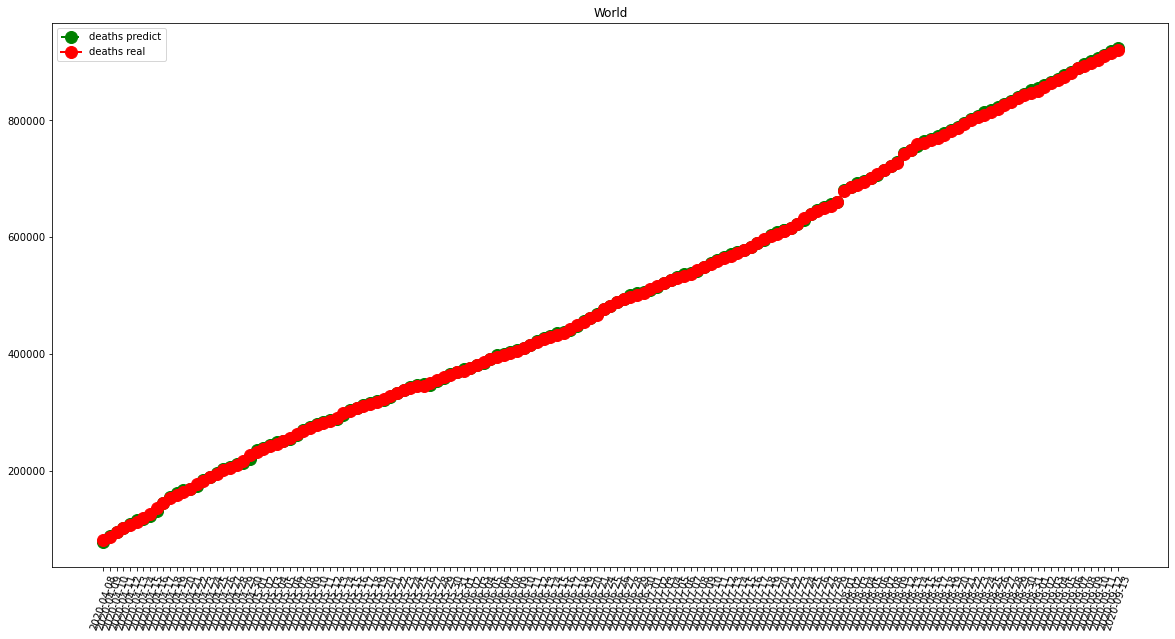

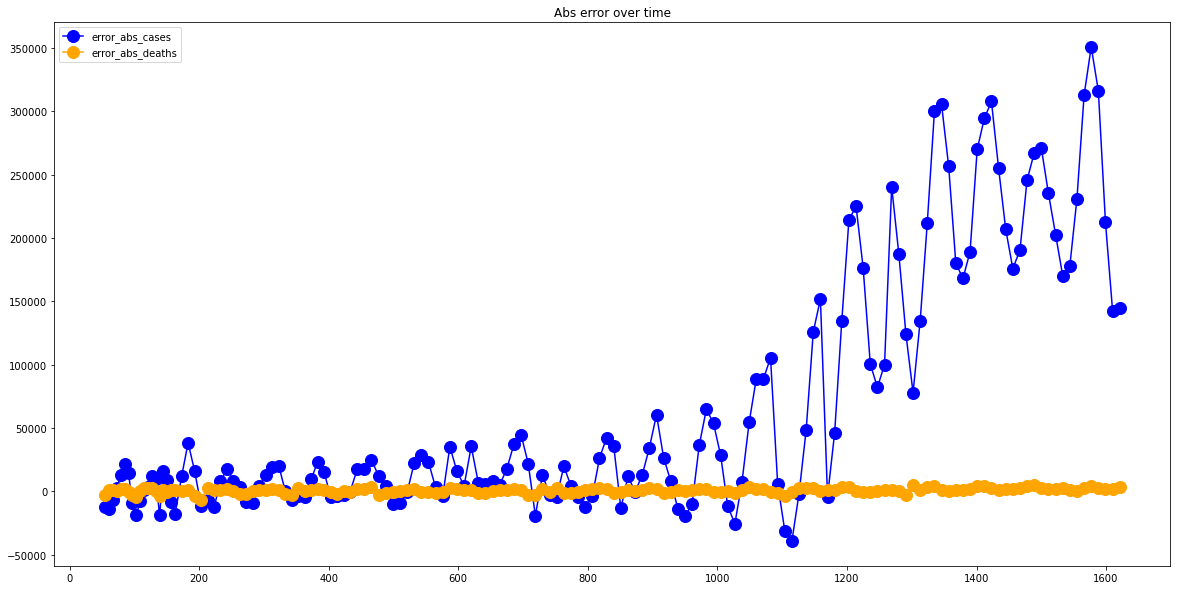

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1081.0670731707316
RMSE =  1605.241044508771
-- France performances for deaths --
MAE =  115.26219512195122
RMSE =  262.0024553040789


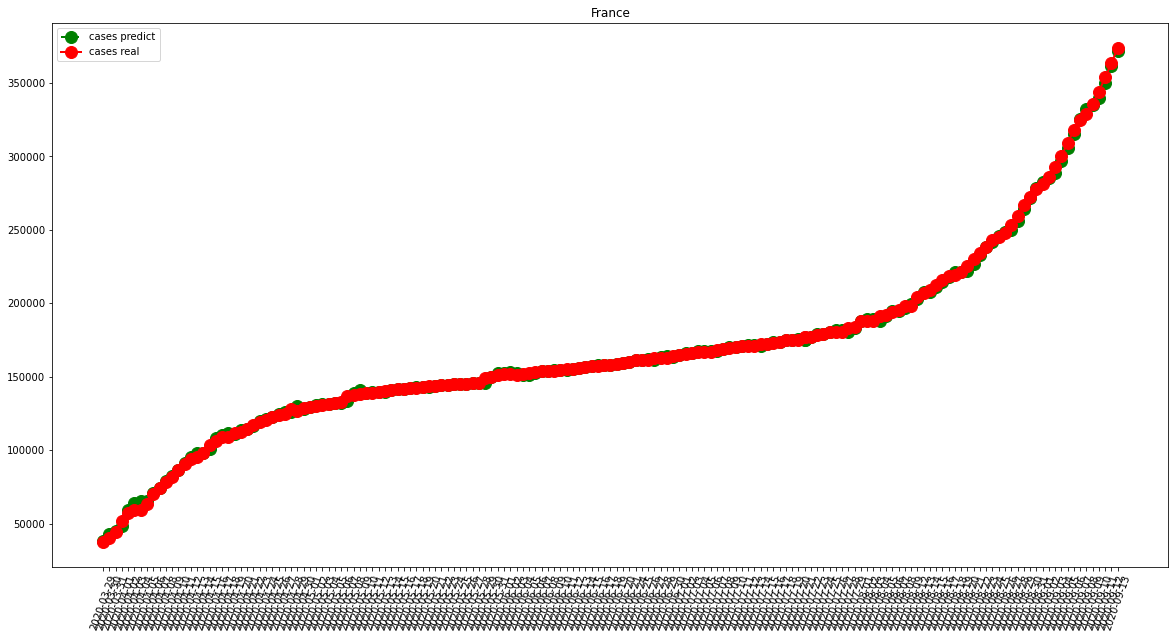

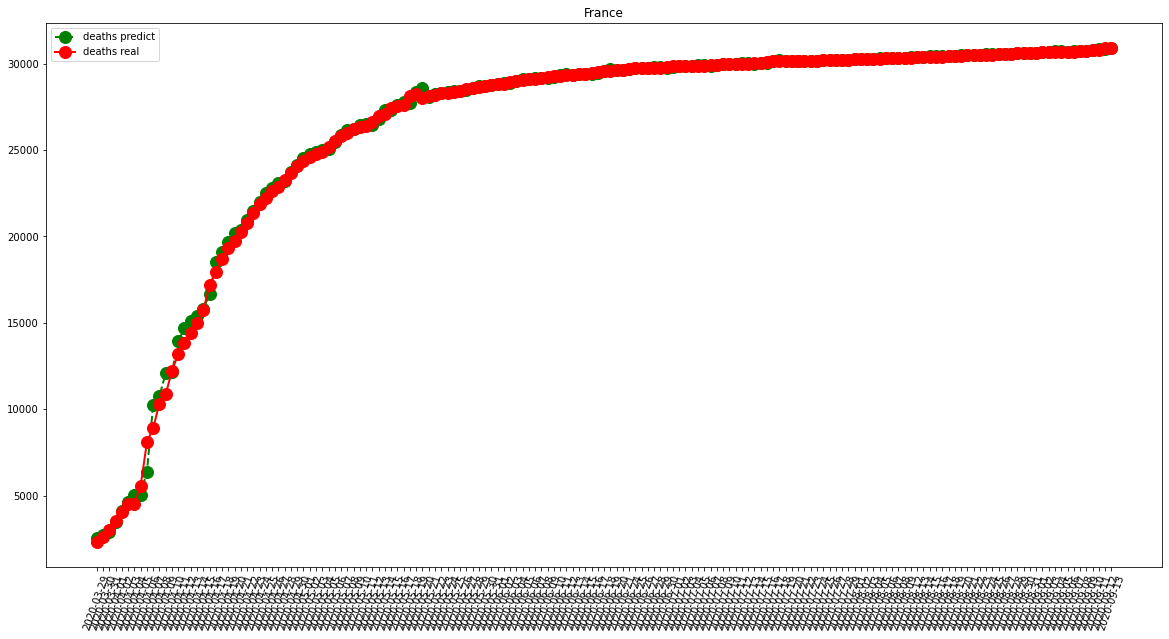

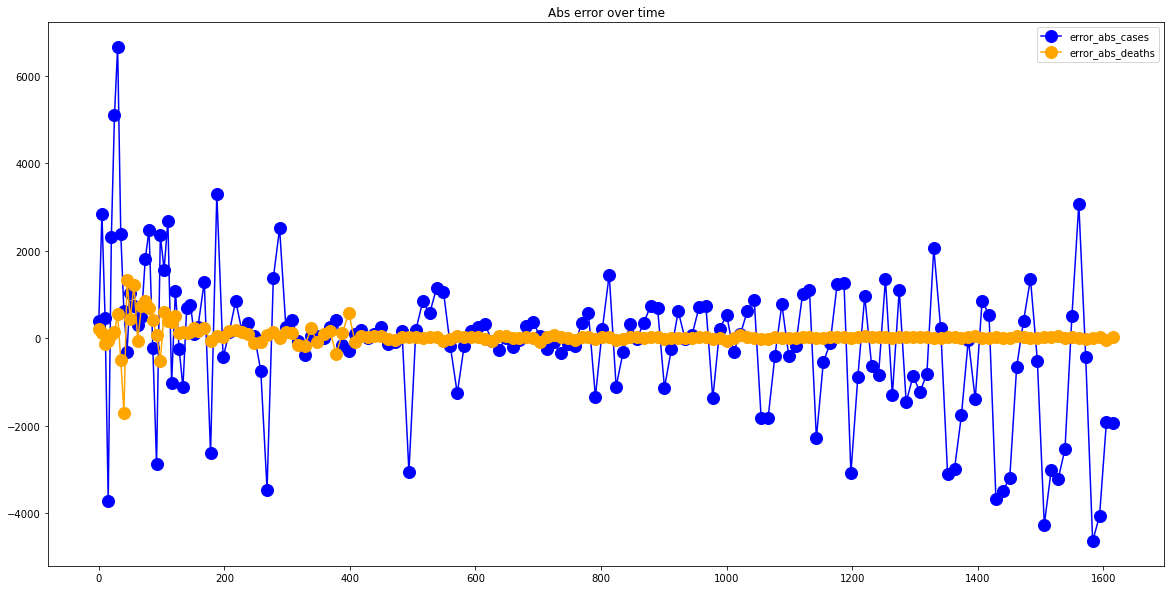

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  305.2621951219512
RMSE =  450.6921303300773
-- Italy performances for deaths --
MAE =  69.21951219512195
RMSE =  231.85150840833344


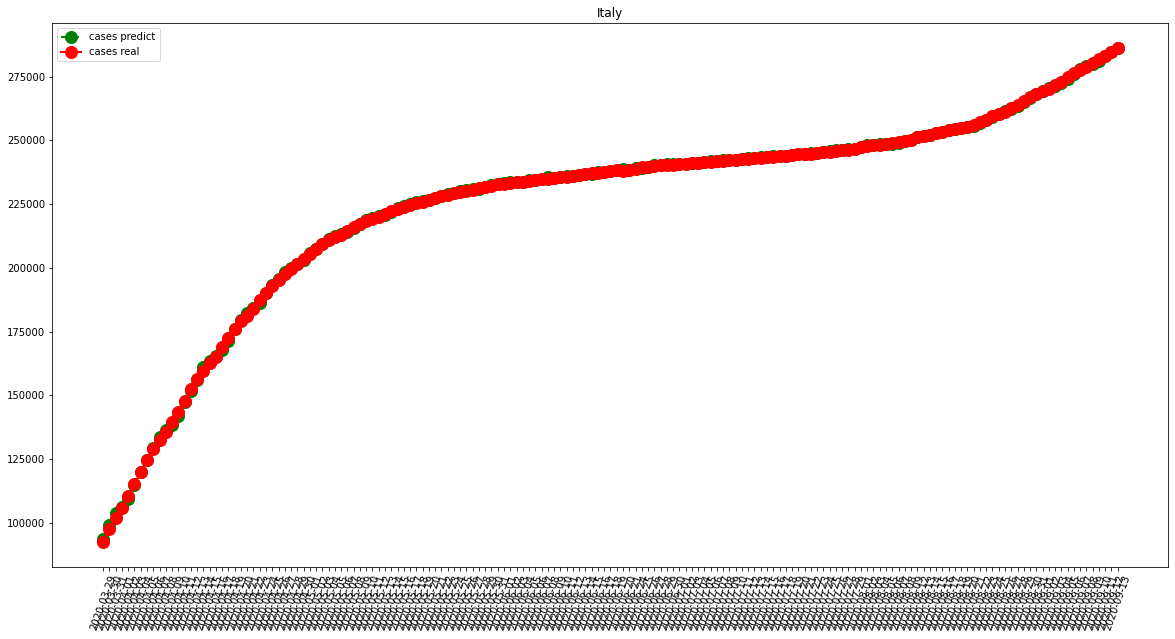

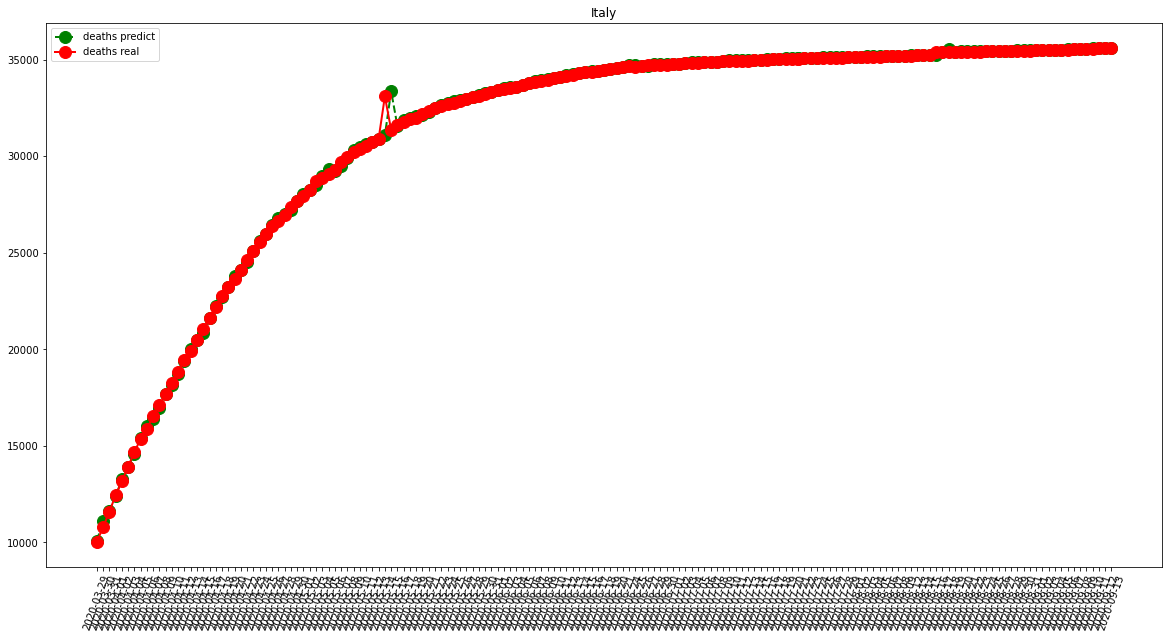

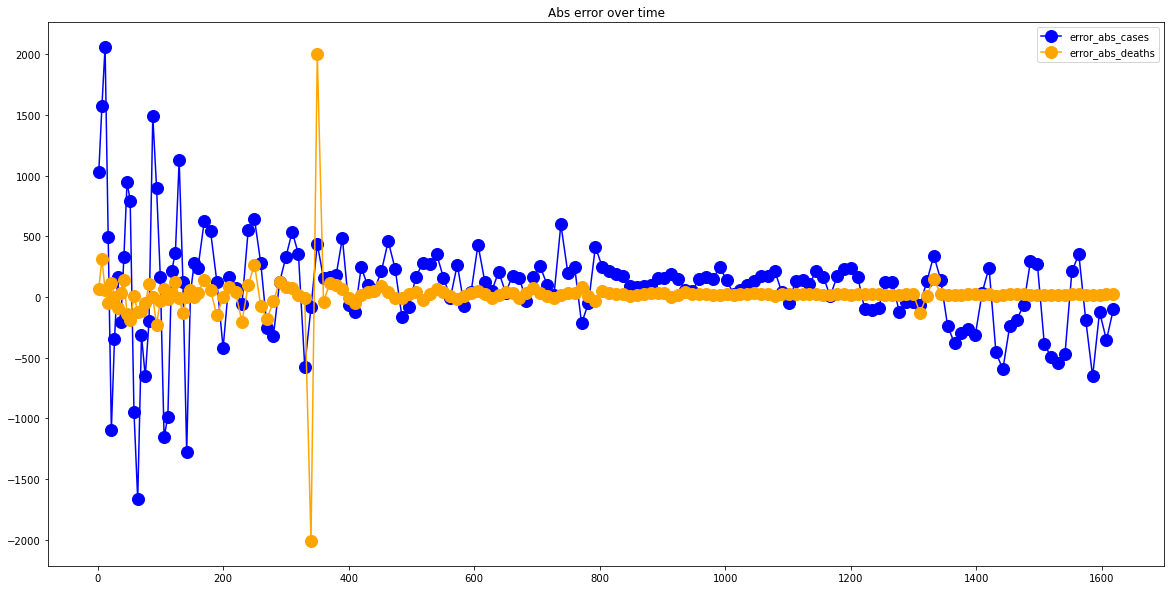

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  2291.8353658536585
RMSE =  4436.114482429361
-- Spain performances for deaths --
MAE =  121.41463414634147
RMSE =  317.9453857074874


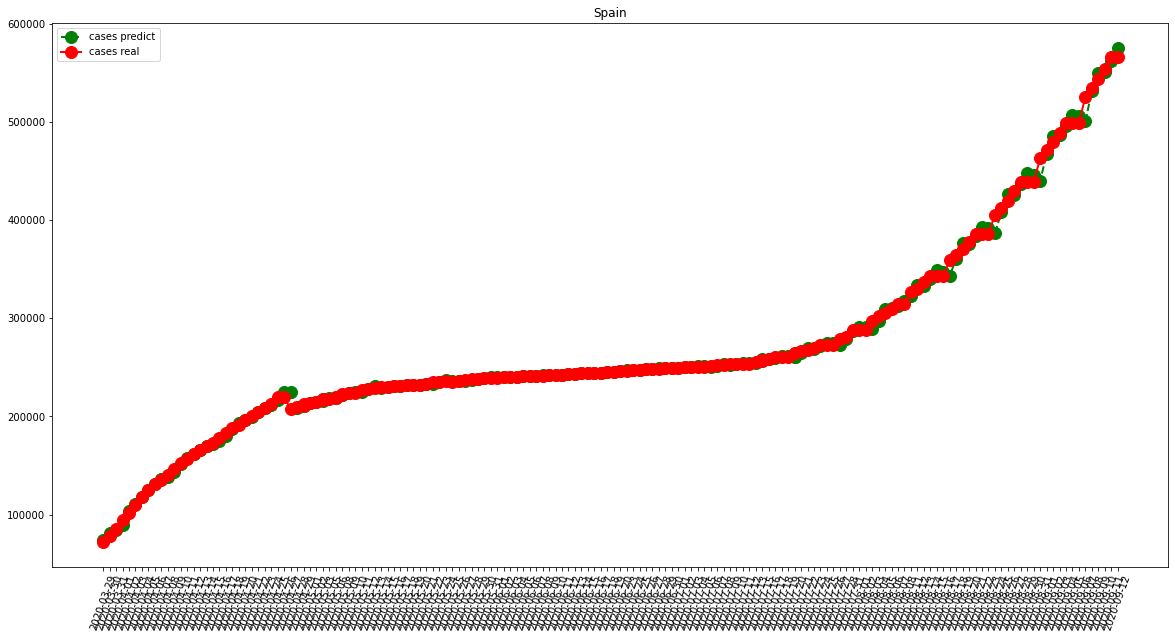

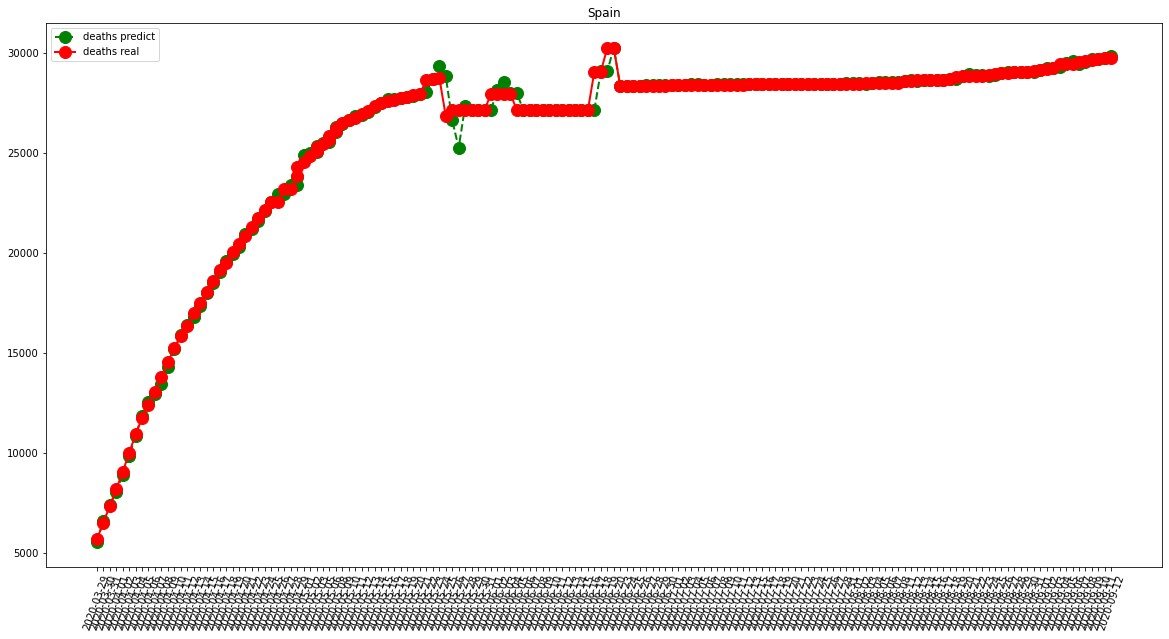

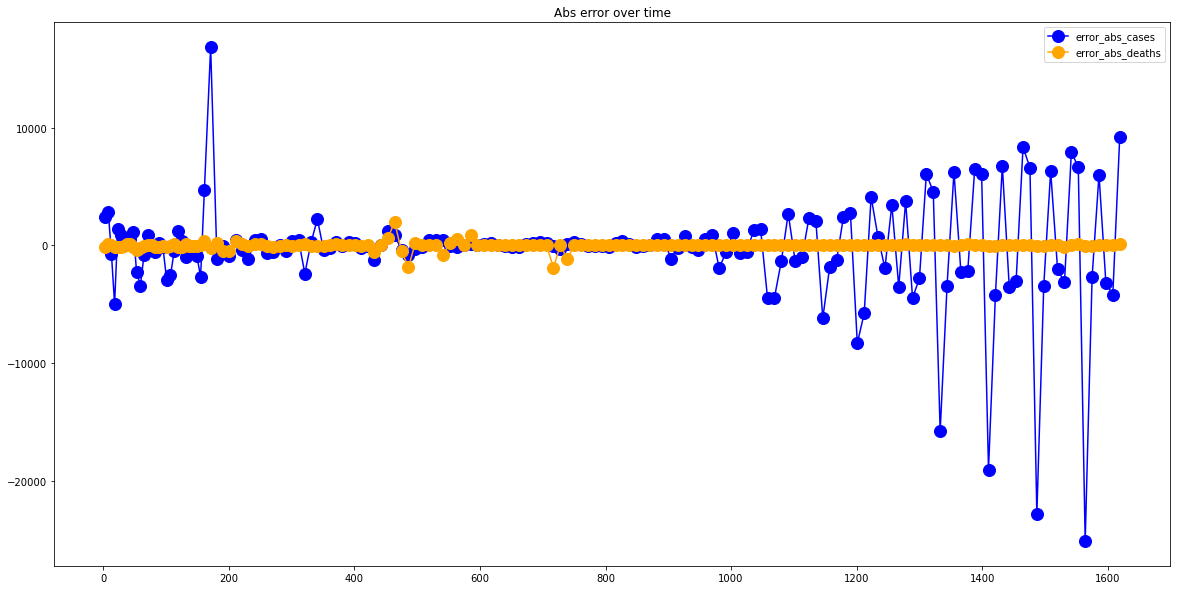

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  14497.384146341463
RMSE =  22108.56710795779
-- United States performances for deaths --
MAE =  480.8353658536585
RMSE =  677.6637278538527


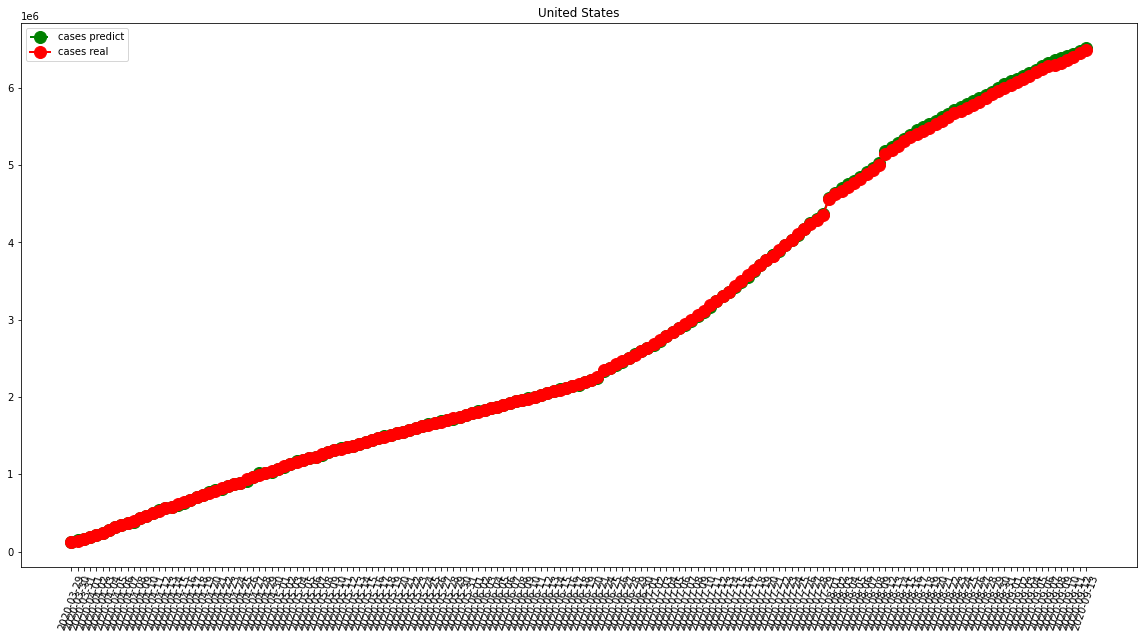

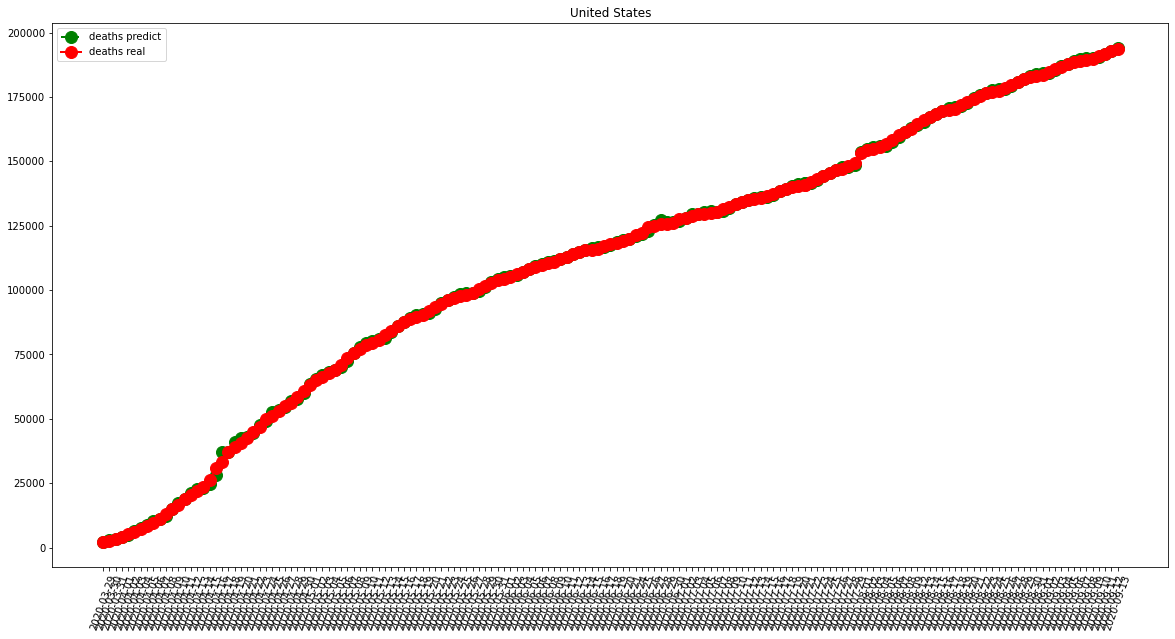

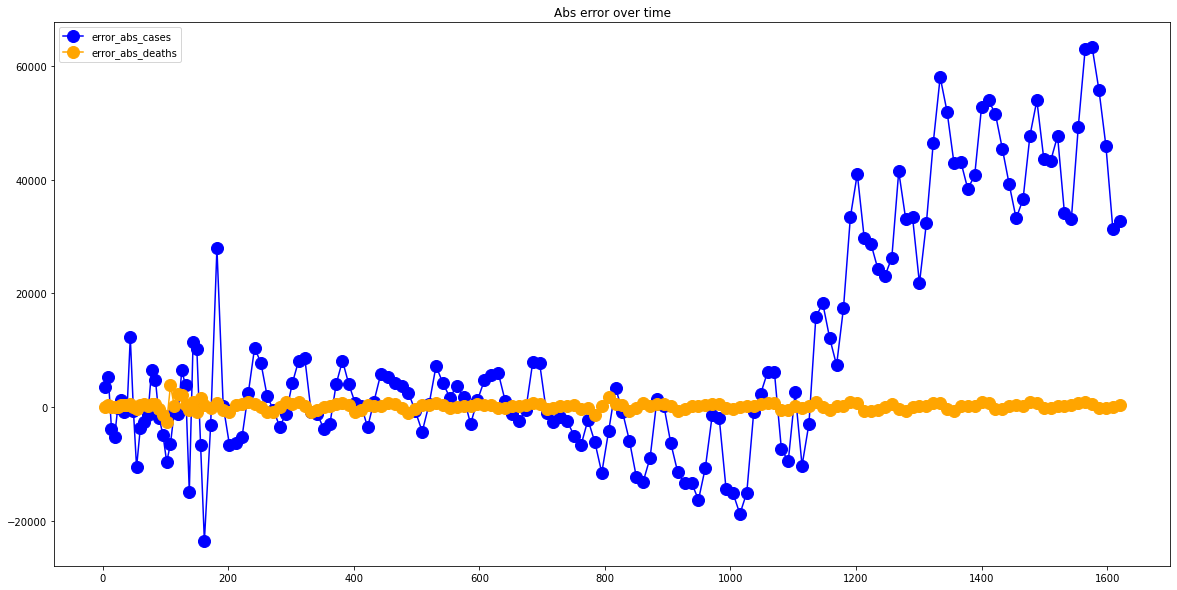

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  61.61585365853659
RMSE =  93.20842759970665
-- China performances for deaths --
MAE =  25.786585365853657
RMSE =  122.6231337343377


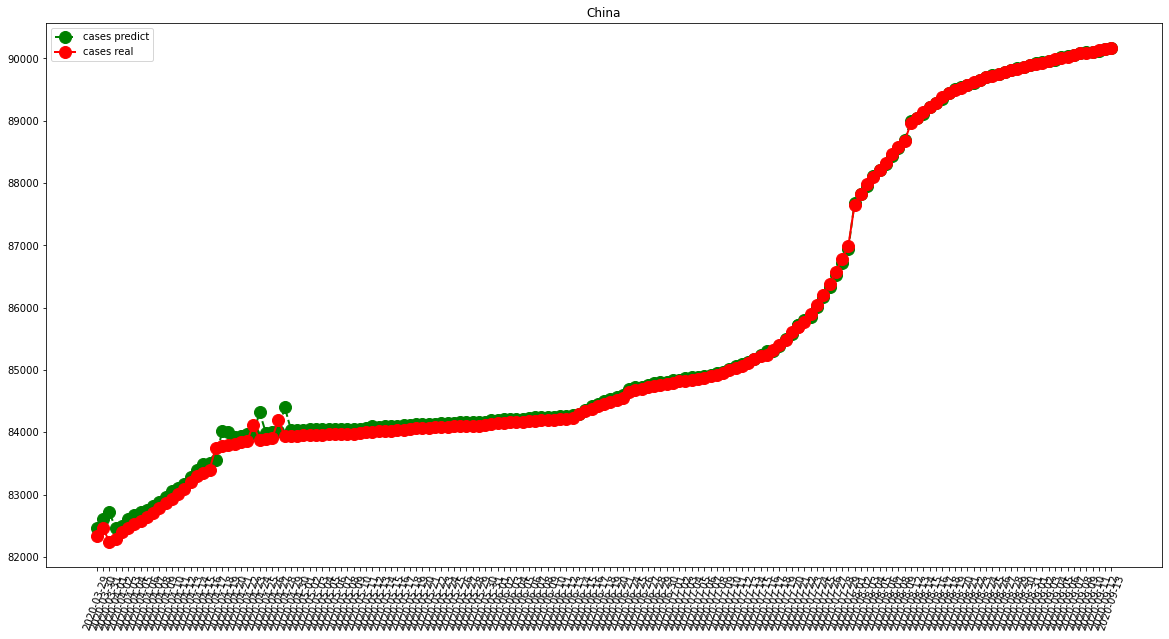

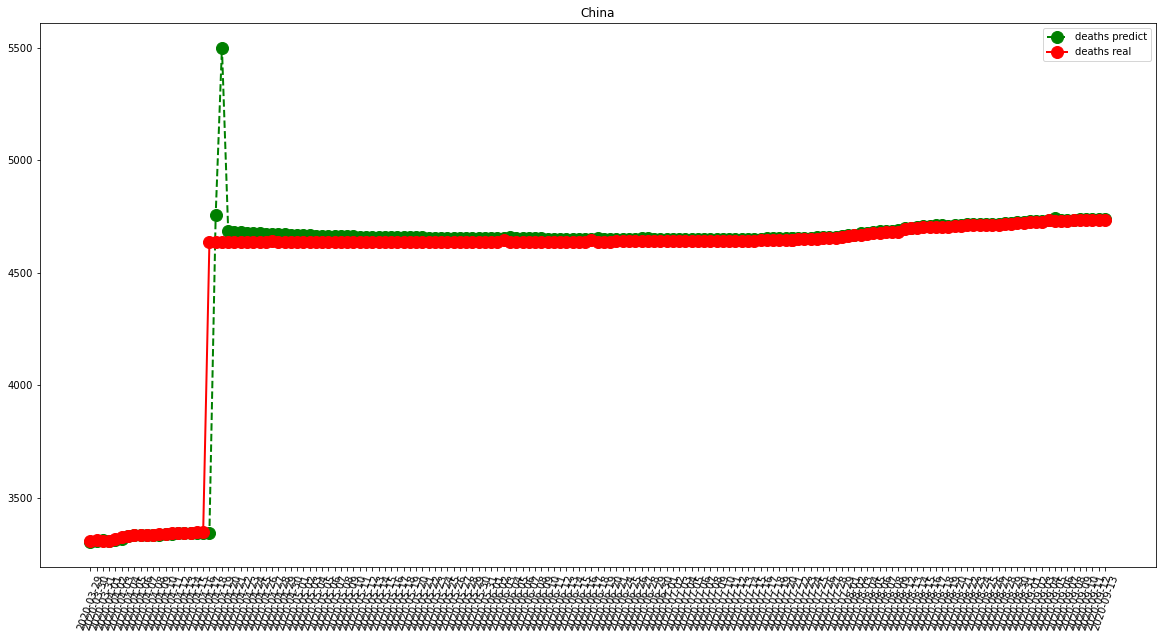

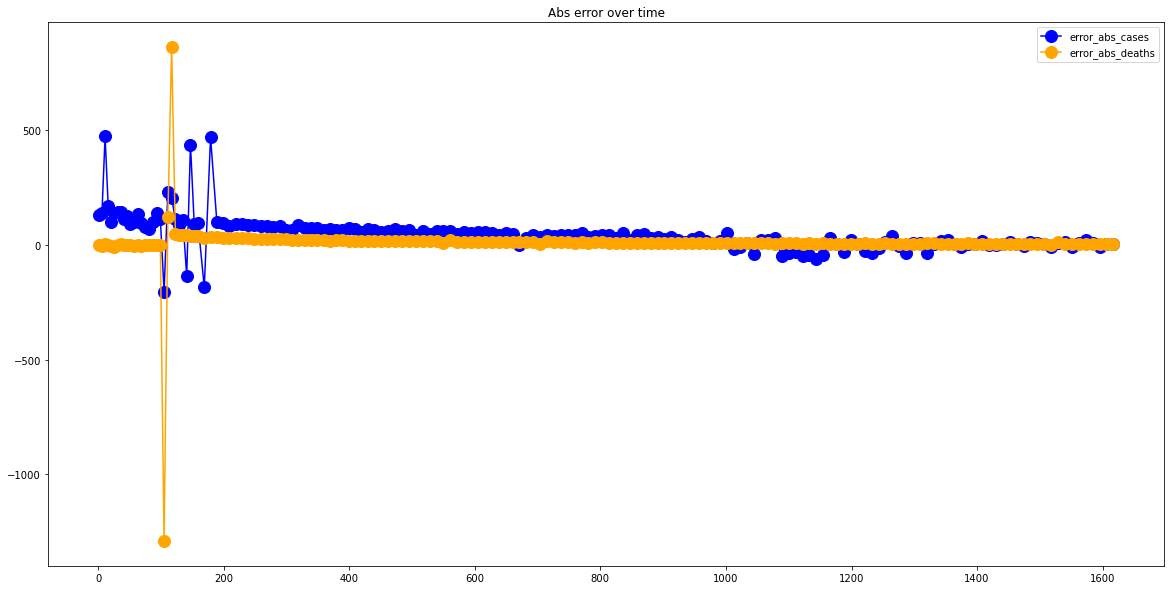

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1023.6617647058823
RMSE =  3593.7509938617554
-- United Kingdom performances for deaths --
MAE =  225.1691176470588
RMSE =  731.8622951878633


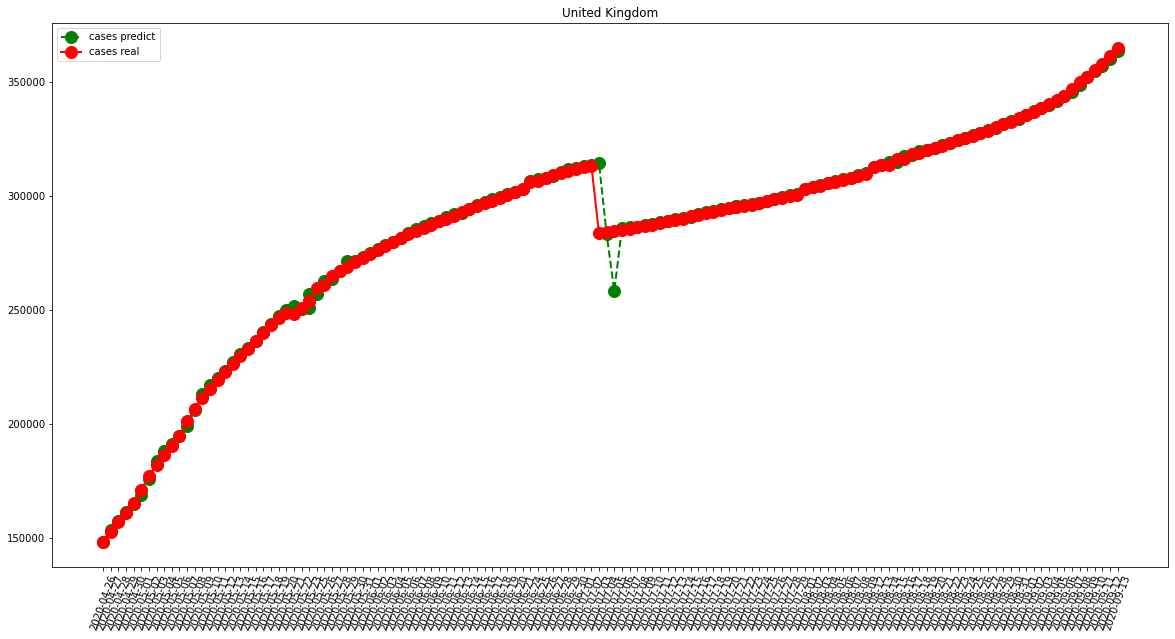

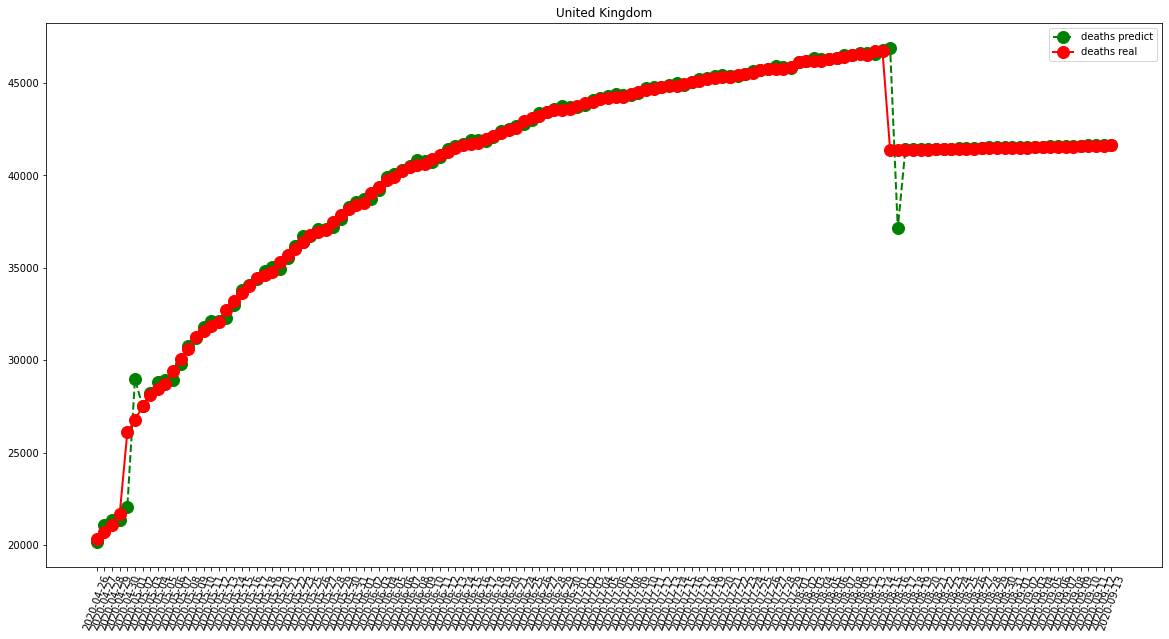

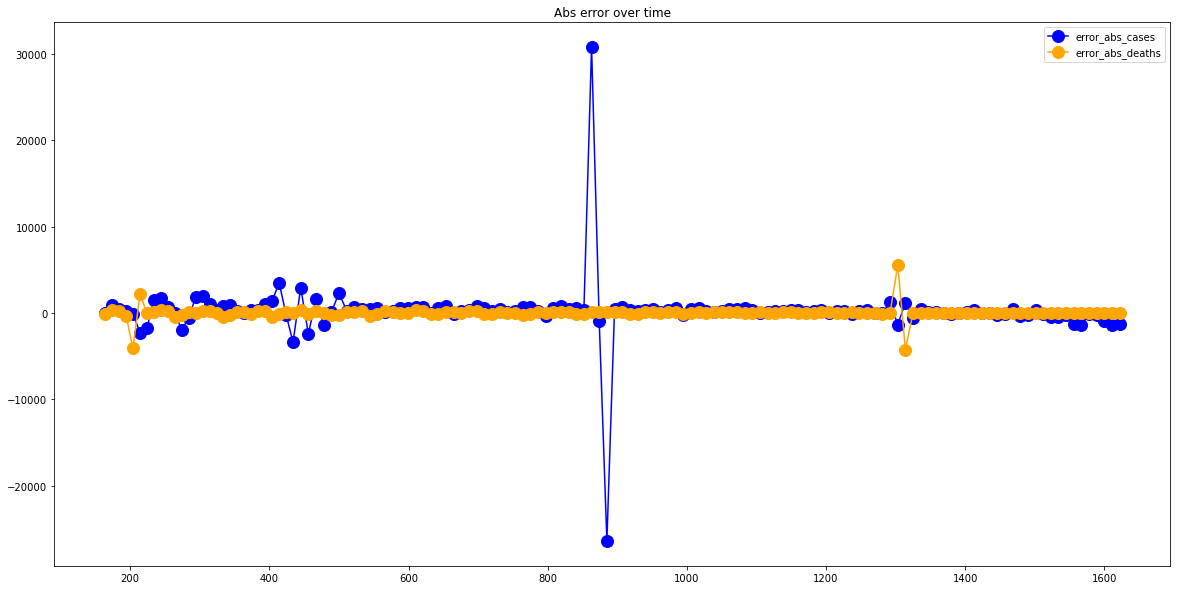

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  404.4117647058824
RMSE =  579.2855767337597
-- Germany performances for deaths --
MAE =  19.720588235294116
RMSE =  37.751119967803994


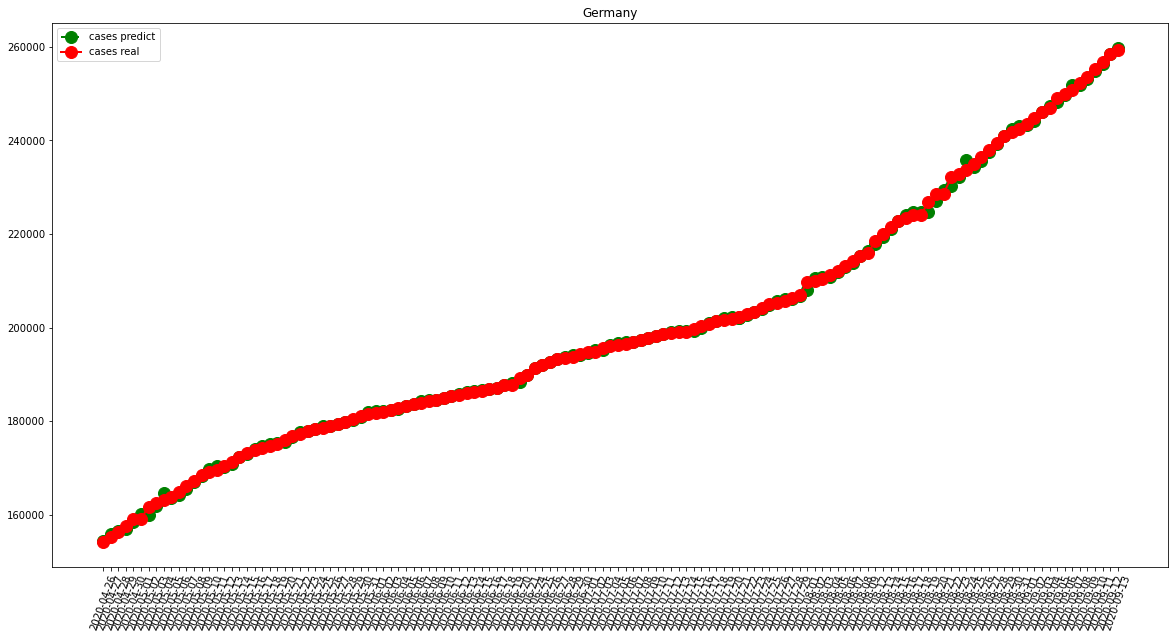

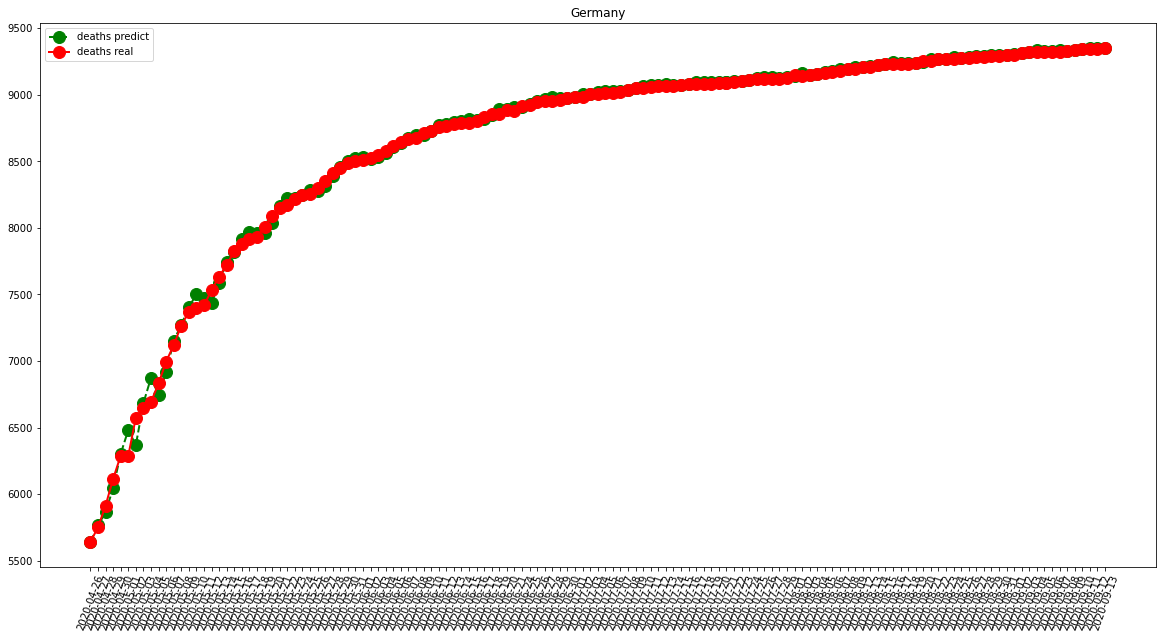

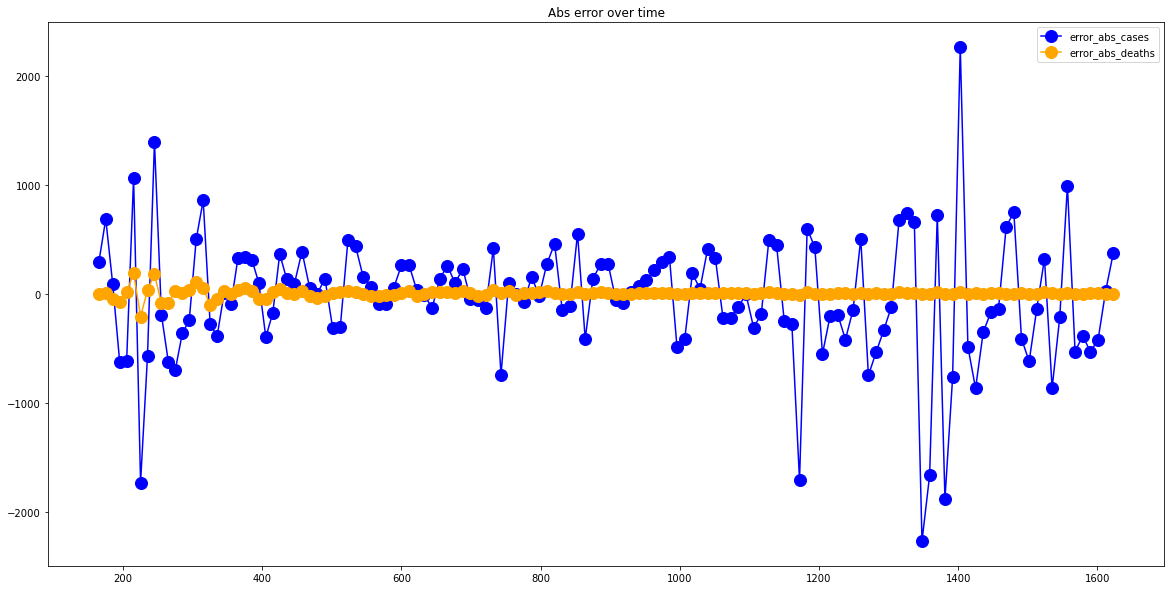

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  886.9191176470588
RMSE =  1249.12755141574
-- Iran performances for deaths --
MAE =  51.286764705882355
RMSE =  86.33088704990543


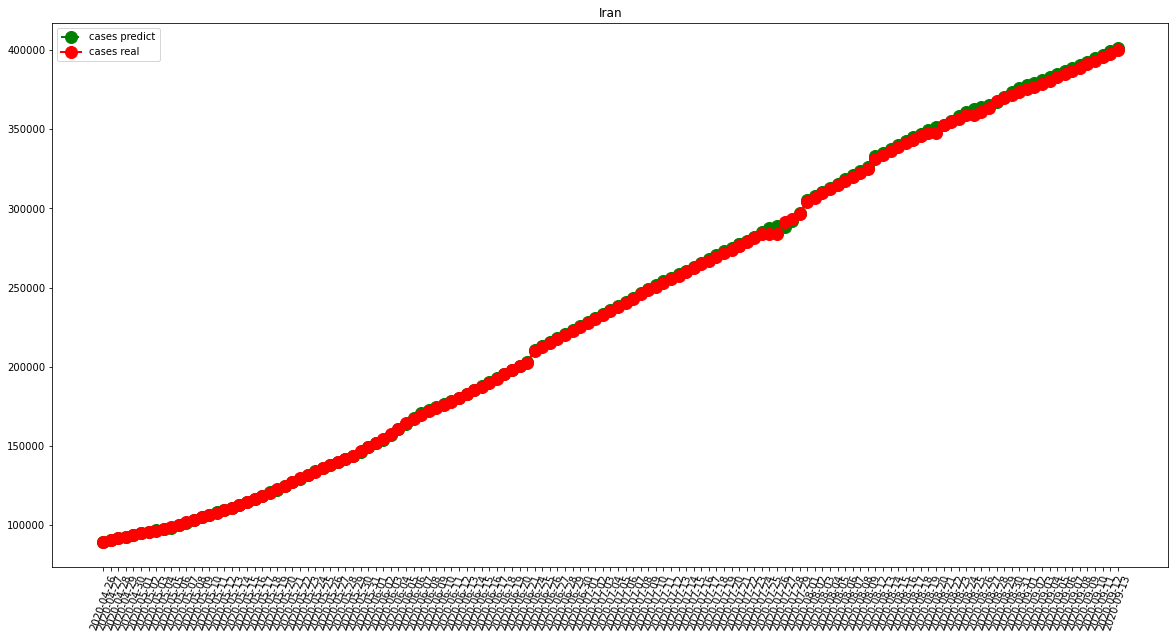

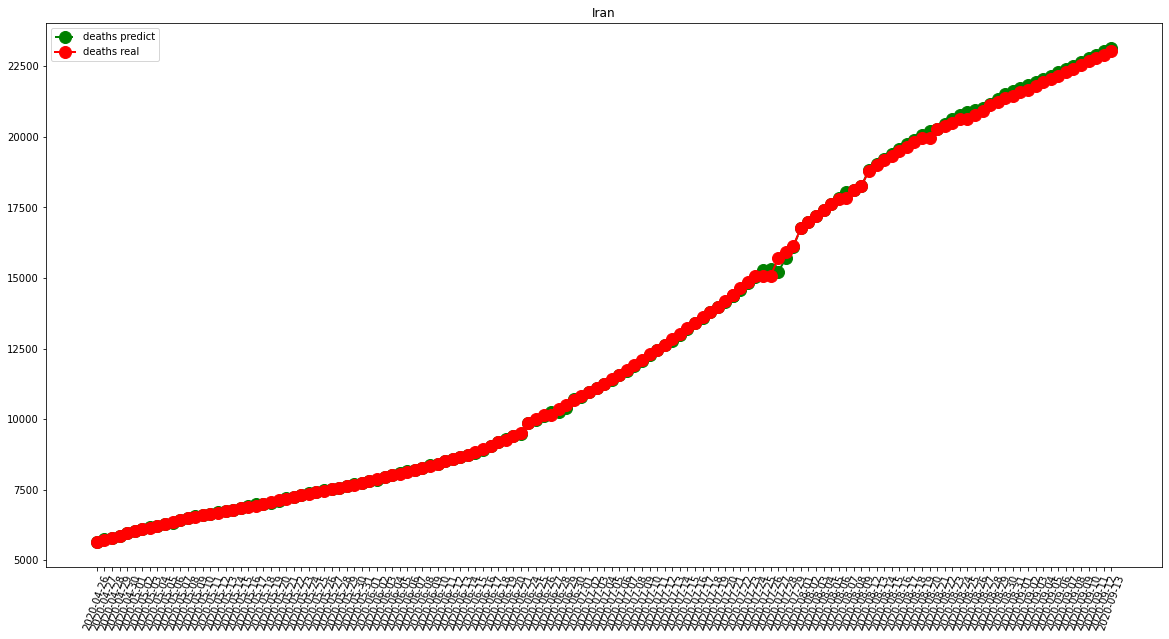

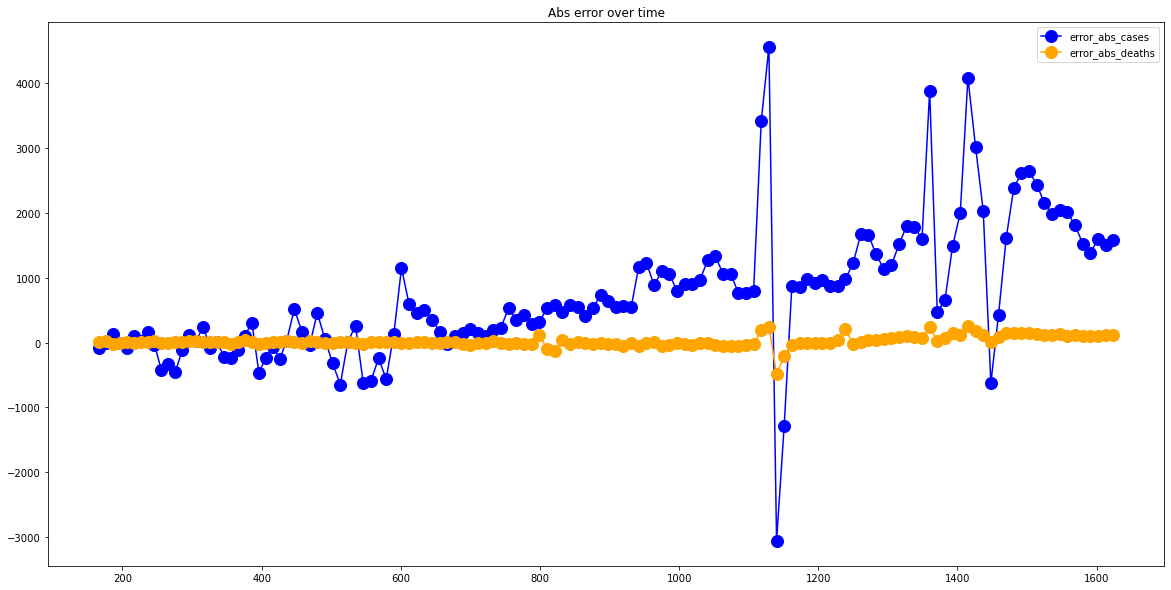

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  212.50735294117646
RMSE =  326.47179186317607
-- Turkey performances for deaths --
MAE =  15.926470588235293
RMSE =  87.17848493346348


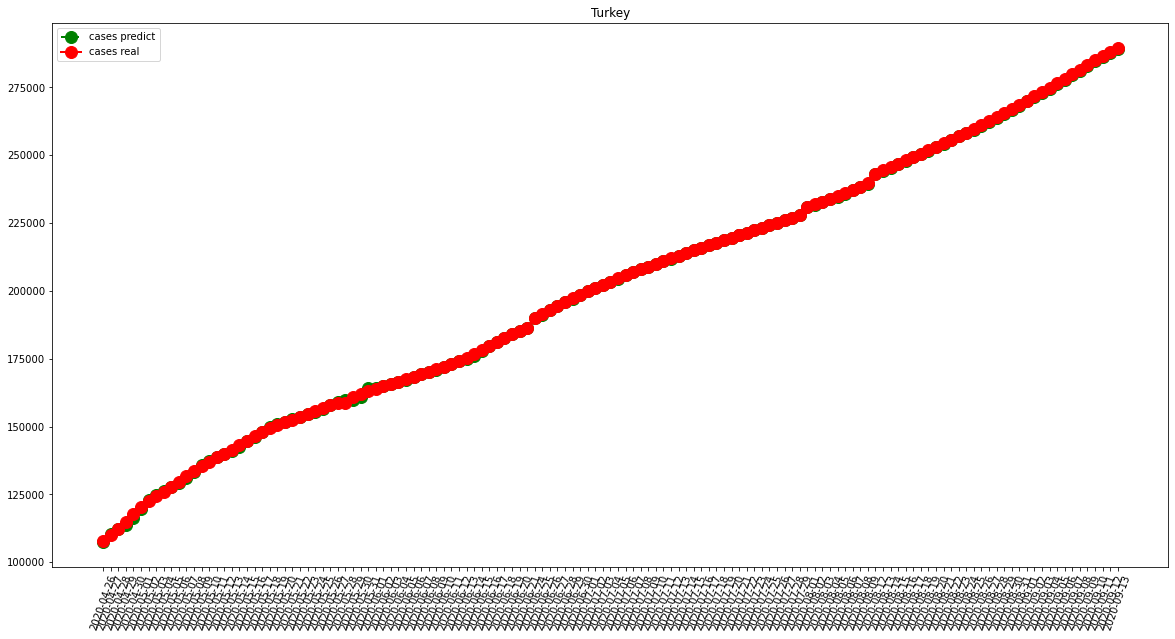

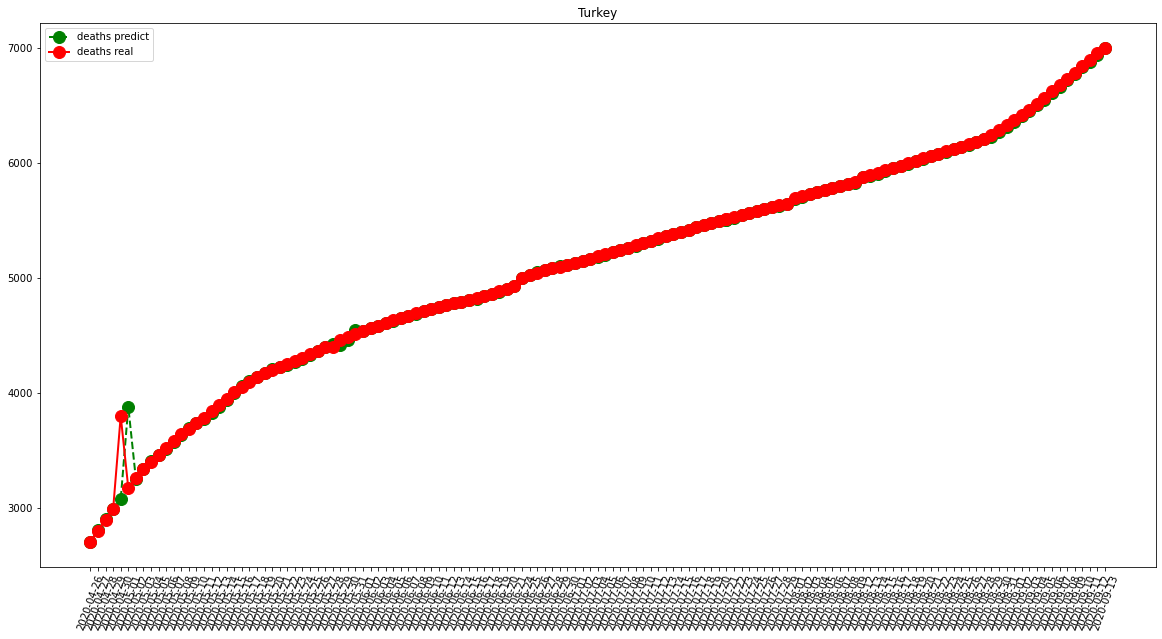

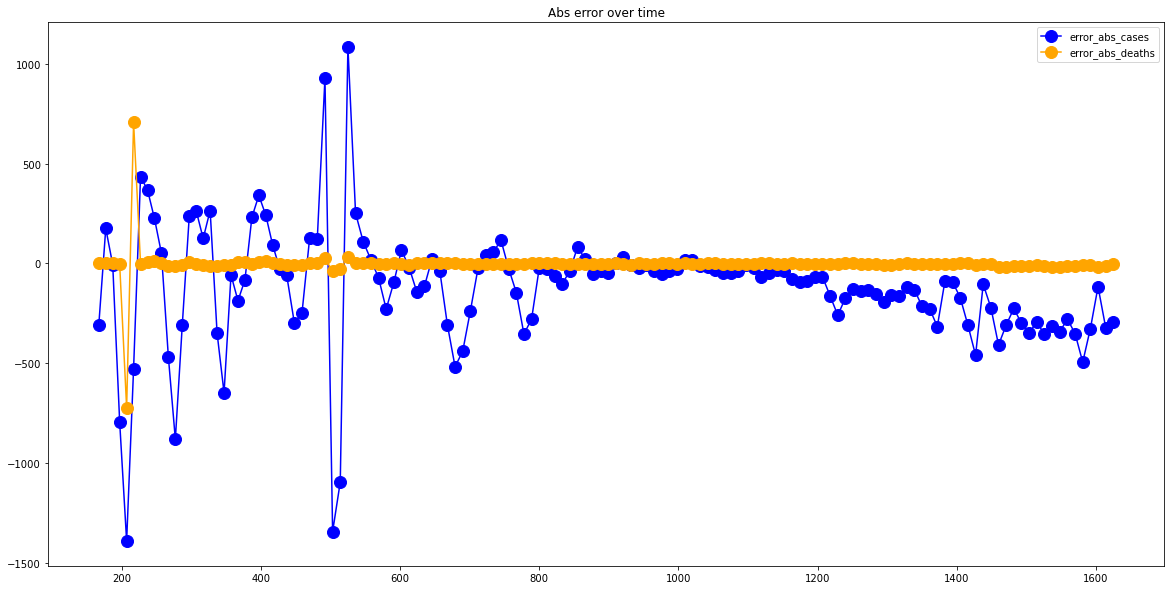

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  15386.660550458715
RMSE =  20500.037111624497
-- Brazil performances for deaths --
MAE =  467.11009174311926
RMSE =  570.9273721062807


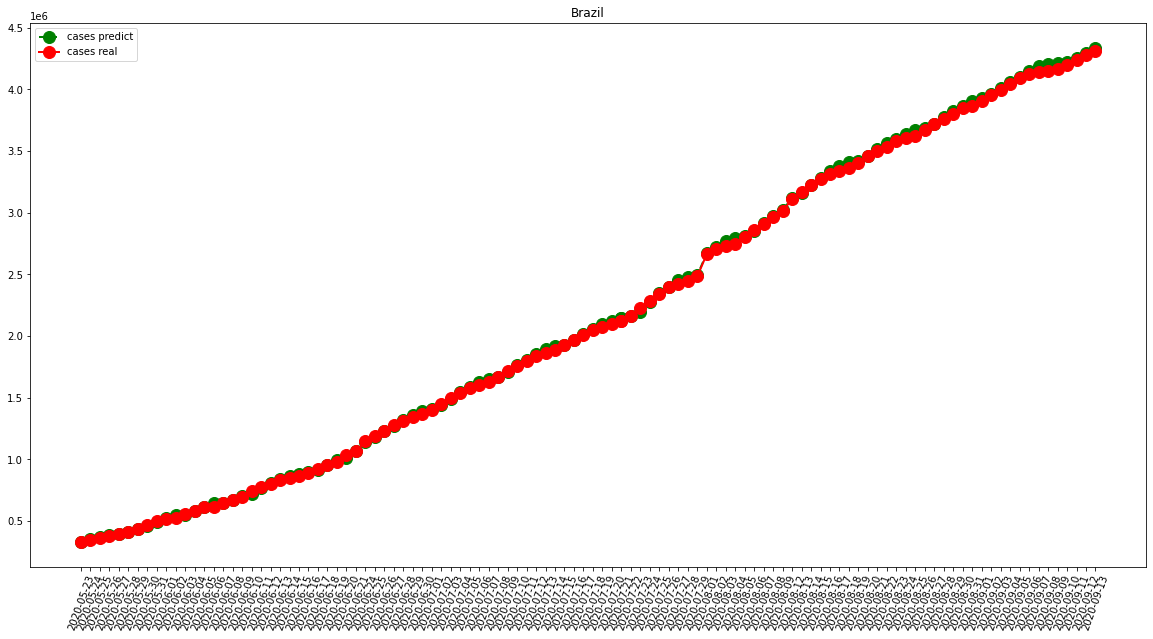

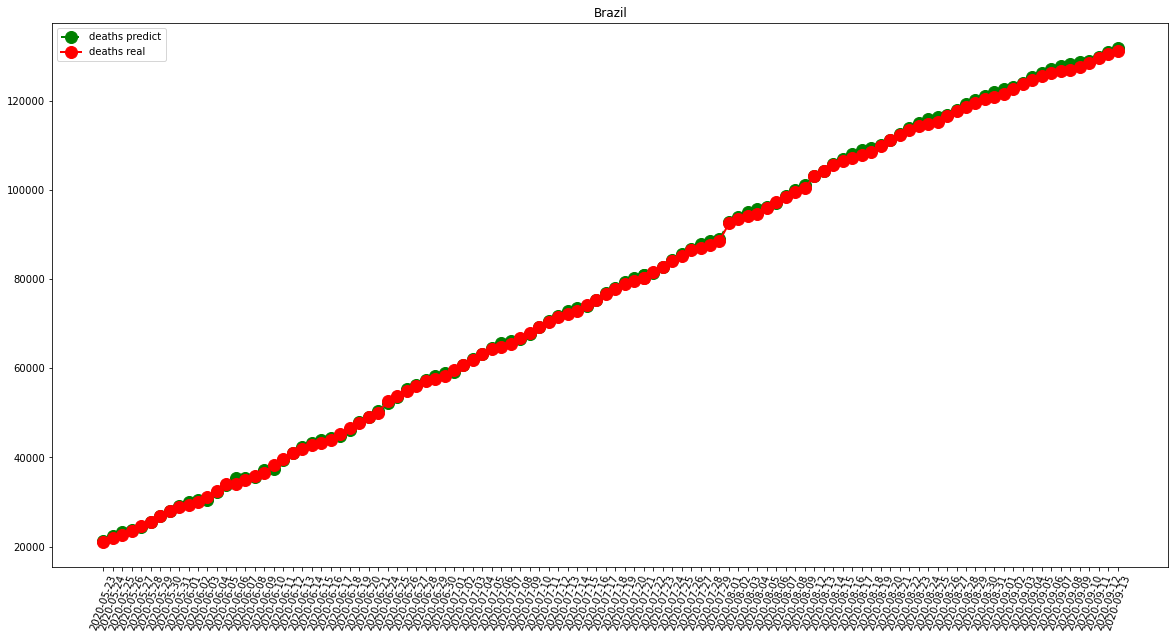

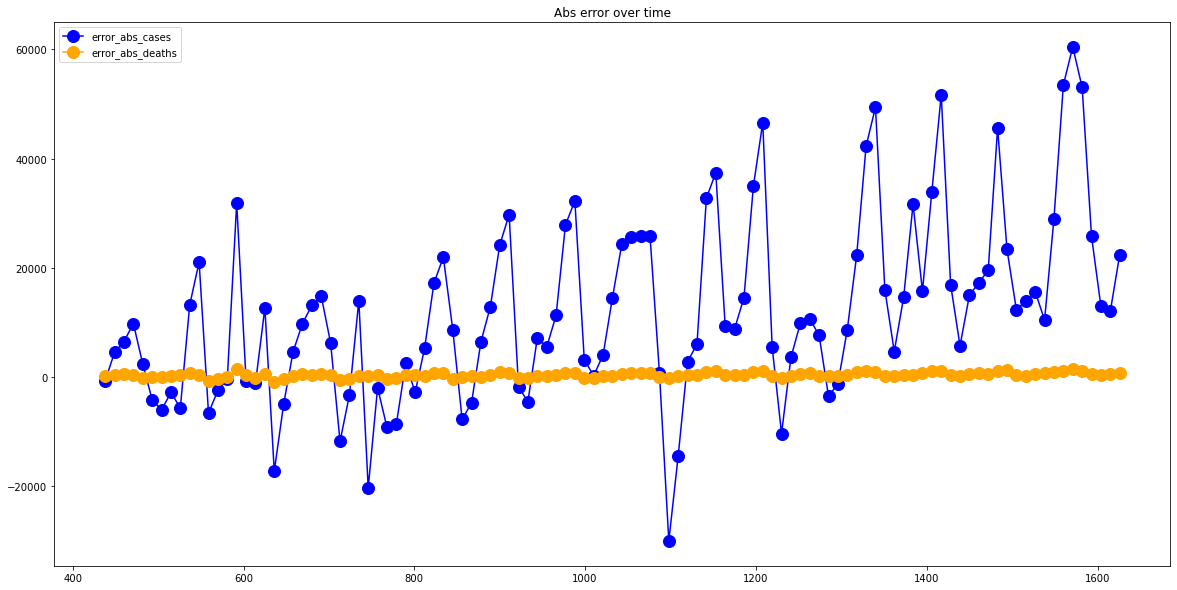

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)